# Maintenance Cost Reduction Prediction Project
$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

A company has a fleet of devices transmitting daily telemetry readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.


The goal of this project is to predict when/which devices potentially are going to fail
next. Seven predictive models have been developed as comparison and the best model is recommended
after comprehensive comparison. Data has been detailedly exploratoried and additional features are created as 
essential indication to improve the performance.

-------------------------------
As ever, the contents of this project are listed as below: 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data
 
**2. Cleaning, transforming and visualizing**
- 2.1 Feature engineering - category features
- 2.2 Further EDA - STD and PCT_Change new features
- 2.3 Train/test split
- 2.4 Imbalanced process - upsampling
  
**3. Modeling** 
- 3.1 Model 1: Logistic Regression Model
- 3.2 Model 2: SVM Model
- 3.3 Model 3: Random Forest Model
- 3.4 Model 4: Decision Tree Model
- 3.5 Model 5: Deep Learning - Neural Network
- 3.6 Model 6 & 7: Voting Classifer

**4. Evaluating and concluding** 
- 4.1 Precision and Recall Comparison
- 4.2 Conclusion and Recommendation


# 1. Sourcing and loading

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from pathlib import Path
import numpy as np
import re
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
import math
import imblearn 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('predictive_maintenance.csv', parse_dates=['date'])

In [3]:
df.head()

date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       56        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric8  metric9  
0        6   407438        0        0        7  
1        6   403174        0        0        0  
2       12   237394        0        0        0  
3        6   410186        0        0        0  
4       15   313173        0        0        3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     124494 non-null  datetime64[ns]
 1   device   124494 non-null  object        
 2   failure  124494 non-null  int64         
 3   metric1  124494 non-null  int64         
 4   metric2  124494 non-null  int64         
 5   metric3  124494 non-null  int64         
 6   metric4  124494 non-null  int64         
 7   metric5  124494 non-null  int64         
 8   metric6  124494 non-null  int64         
 9   metric7  124494 non-null  int64         
 10  metric8  124494 non-null  int64         
 11  metric9  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB


In [5]:
df.describe()

failure       metric1        metric2        metric3  \
count  124494.000000  1.244940e+05  124494.000000  124494.000000   
mean        0.000851  1.223881e+08     159.484762       9.940455   
std         0.029167  7.045933e+07    2179.657730     185.747321   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.128476e+07       0.000000       0.000000   
50%         0.000000  1.227974e+08       0.000000       0.000000   
75%         0.000000  1.833096e+08       0.000000       0.000000   
max         1.000000  2.441405e+08   64968.000000   24929.000000   

             metric4        metric5        metric6        metric7  \
count  124494.000000  124494.000000  124494.000000  124494.000000   
mean        1.741120      14.222669  260172.657726       0.292528   
std        22.908507      15.943028   99151.078547       7.436924   
min         0.000000       1.000000       8.000000       0.000000   
25%         0.000000       8.000000  221452.000000       0.000000   
50%         0.000000      10.000000  249799.500000       0.000000   
75%         0.000000      12.000000  310266.000000       0.000000   
max      1666.000000      98.000000  689161.000000     832.000000   

             metric8        metric9  
count  124494.000000  124494.000000  
mean        0.292528      12.451524  
std         7.436924     191.425623  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max       832.000000   18701.000000

In [6]:
df["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

# 2. Cleaning, transforming and visualizing

### 2.1 Feature engineering - category features

In [7]:
df["date"].value_counts()

2015-01-03    1163
2015-01-01    1163
2015-01-02    1163
2015-01-04    1162
2015-01-05    1161
              ... 
2015-11-02      31
2015-10-31      31
2015-10-27      31
2015-10-30      31
2015-10-29      31
Name: date, Length: 304, dtype: int64

In [8]:
df["date_cat"] = df["date"].astype("category")
df["date_month"] = df['date_cat'].dt.month
df["date_weekday"] = df['date_cat'].dt.dayofweek
print(df.groupby("date_month").size())
print(df.groupby("date_weekday").size())

date_month
1     25032
2     19500
3     19833
4     12012
5     11330
6     10469
7     10531
8      8346
9      4470
10     2940
11       31
dtype: int64
date_weekday
0    17886
1    17534
2    17136
3    18141
4    18041
5    17897
6    17859
dtype: int64


           failure
               sum
date_month        
1               24
2               14
3                9
4                9
5               21


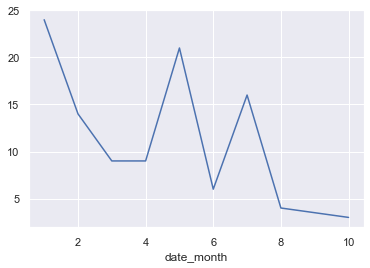

In [39]:
df_month = df.loc[df["failure"] == 1, ["date_month", "failure"]].groupby(["date_month"]).agg(["sum"])
print(df_month.head())
sns.set()
df_month.plot(legend = False)

             failure
                 sum
date_weekday        
0                 27
1                 18
2                 15
3                 22
4                 12


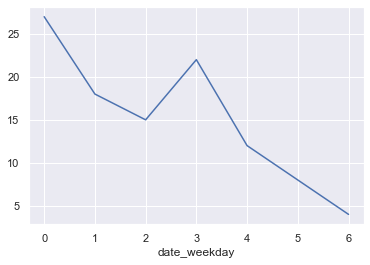

In [38]:
df_weekday = df.loc[df["failure"] == 1, ["date_weekday", "failure"]].groupby(["date_weekday"]).agg(["sum"])
print(df_weekday.head())
sns.set()
df_weekday.plot(legend = False)

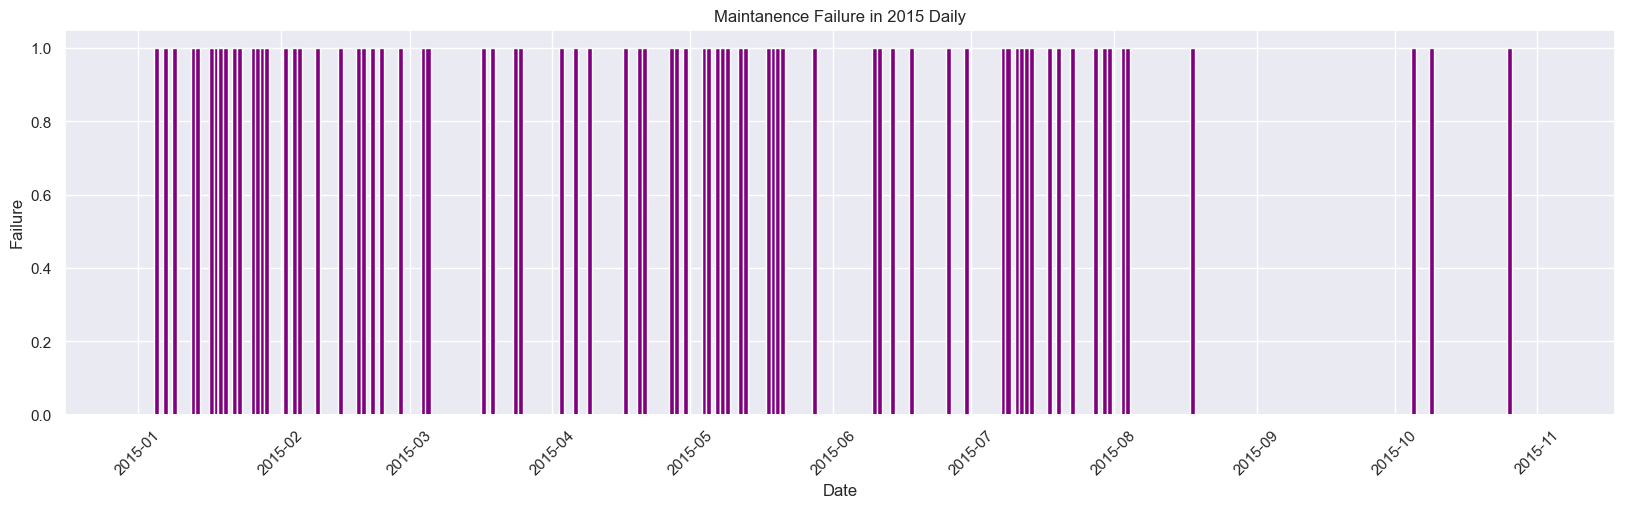

In [113]:
# Create figure and plot space
sns.set()
fig, ax = plt.subplots(figsize=(20, 5))

# Add x-axis and y-axis
ax.bar(df["date"], df["failure"], color='purple', width=1.1)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Failure",
       title="Maintanence Failure in 2015 Daily")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [12]:
df1 = df.resample('W', on='date').sum()
df1.head()

failure       metric1  metric2  metric3  metric4  metric5  \
date                                                                    
2015-01-04        0  574605009416  1881304   136076    19595    55809   
2015-01-11        3  738576615862  2417064    47401    15881    79997   
2015-01-18        4  625470313893  1281496    41508     6896    71480   
2015-01-25       12  605094600044   680664    41096     6261    70815   
2015-02-01        5  612405754450   705456    41078     6296    70656   

               metric6  metric7  metric8  metric9  date_month  date_weekday  
date                                                                         
2015-01-04  1108643013     3168     3168   229463        4651         20928  
2015-01-11  1459948029     2142     2142   116358        6035         16247  
2015-01-18  1259083398     1272     1272    70720        5085         15051  
2015-01-25  1252871765     1728     1728    76906        4986         14953  
2015-02-01  1257979649     1808     1808    72695        5699         14961

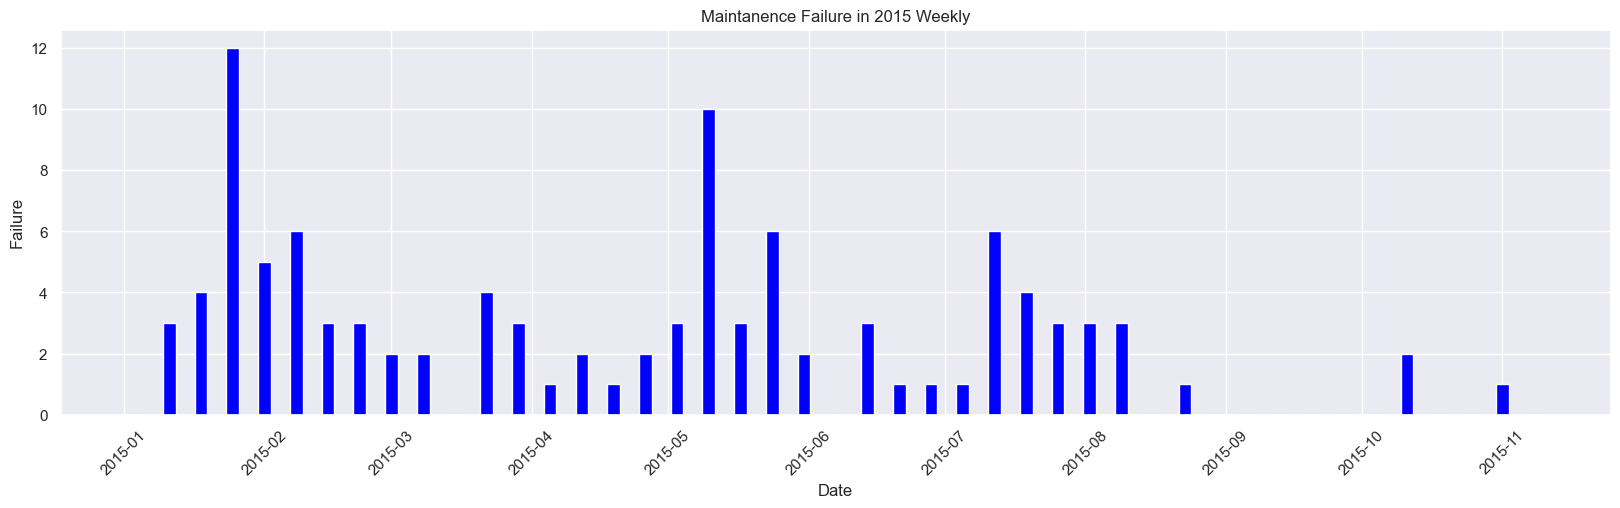

In [112]:
# Create figure and plot space
sns.set()
fig, ax = plt.subplots(figsize=(20, 5))

# Add x-axis and y-axis
ax.bar(df1.index.values, df1["failure"], color='blue', width=2.8)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Failure",
       title="Maintanence Failure in 2015 Weekly")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [18]:
df2 = df.resample('M', on='date').sum()
df2.head()

failure        metric1  metric2  metric3  metric4  metric5  \
date                                                                     
2015-01-31       24  3070334591889  6850320   301287    53893   338695   
2015-02-28       14  2392243498814  2874600   164742    24680   274635   
2015-03-31        9  2424902863541  3302888   162419    32691   284798   
2015-04-30        9  1483418760960   914432    70781    18285   184301   
2015-05-31       21  1387078212434   835224   127631    32318   175243   

               metric6  metric7  metric8  metric9  date_month  date_weekday  
date                                                                         
2015-01-31  6158782773    10006    10006   556053       25032         77868  
2015-02-28  4909604046     1656     1656   281360       39000         58421  
2015-03-31  5061130092     2032     2032   260404       59499         58154  
2015-04-30  3137391230     4560     4560    36332       48048         35722  
2015-05-31  2943043116      640      640   110037       56650         36178

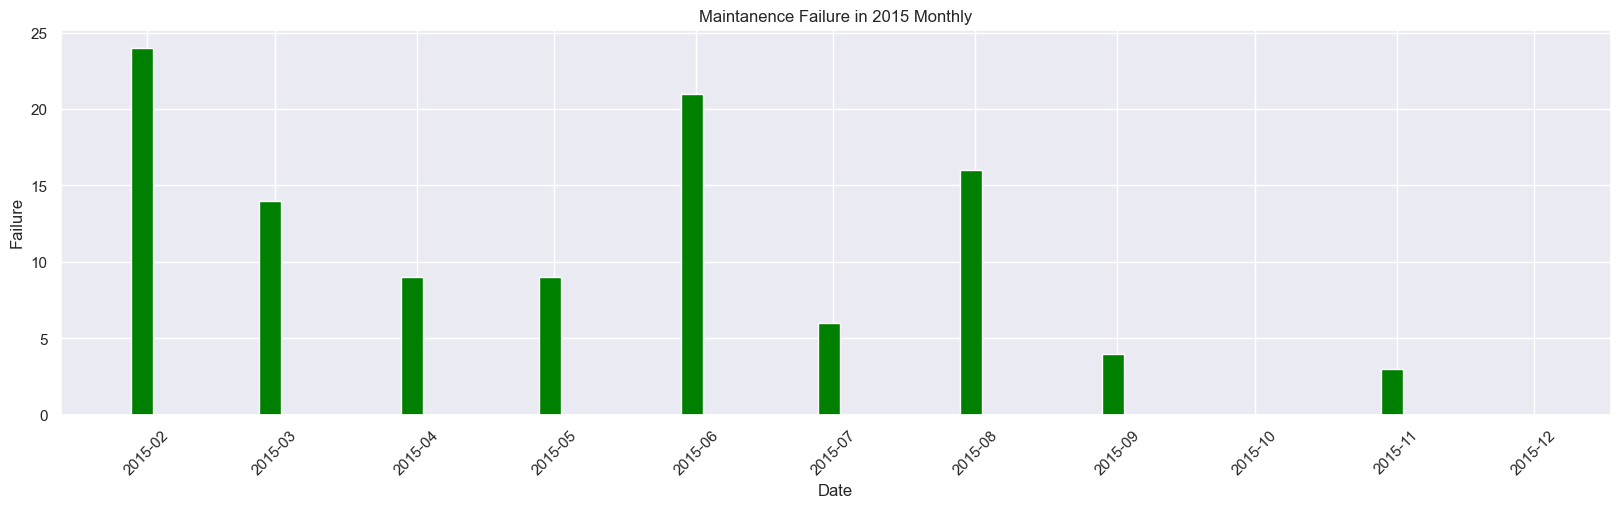

In [111]:
# Create figure and plot space
sns.set()
fig, ax = plt.subplots(figsize=(20, 5))

# Add x-axis and y-axis
ax.bar(df2.index.values, df2["failure"], color='Green', width=4.8)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Failure",
       title="Maintanence Failure in 2015 Monthly")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

### 2.2 Further EDA - STD and PCT_Change New Features

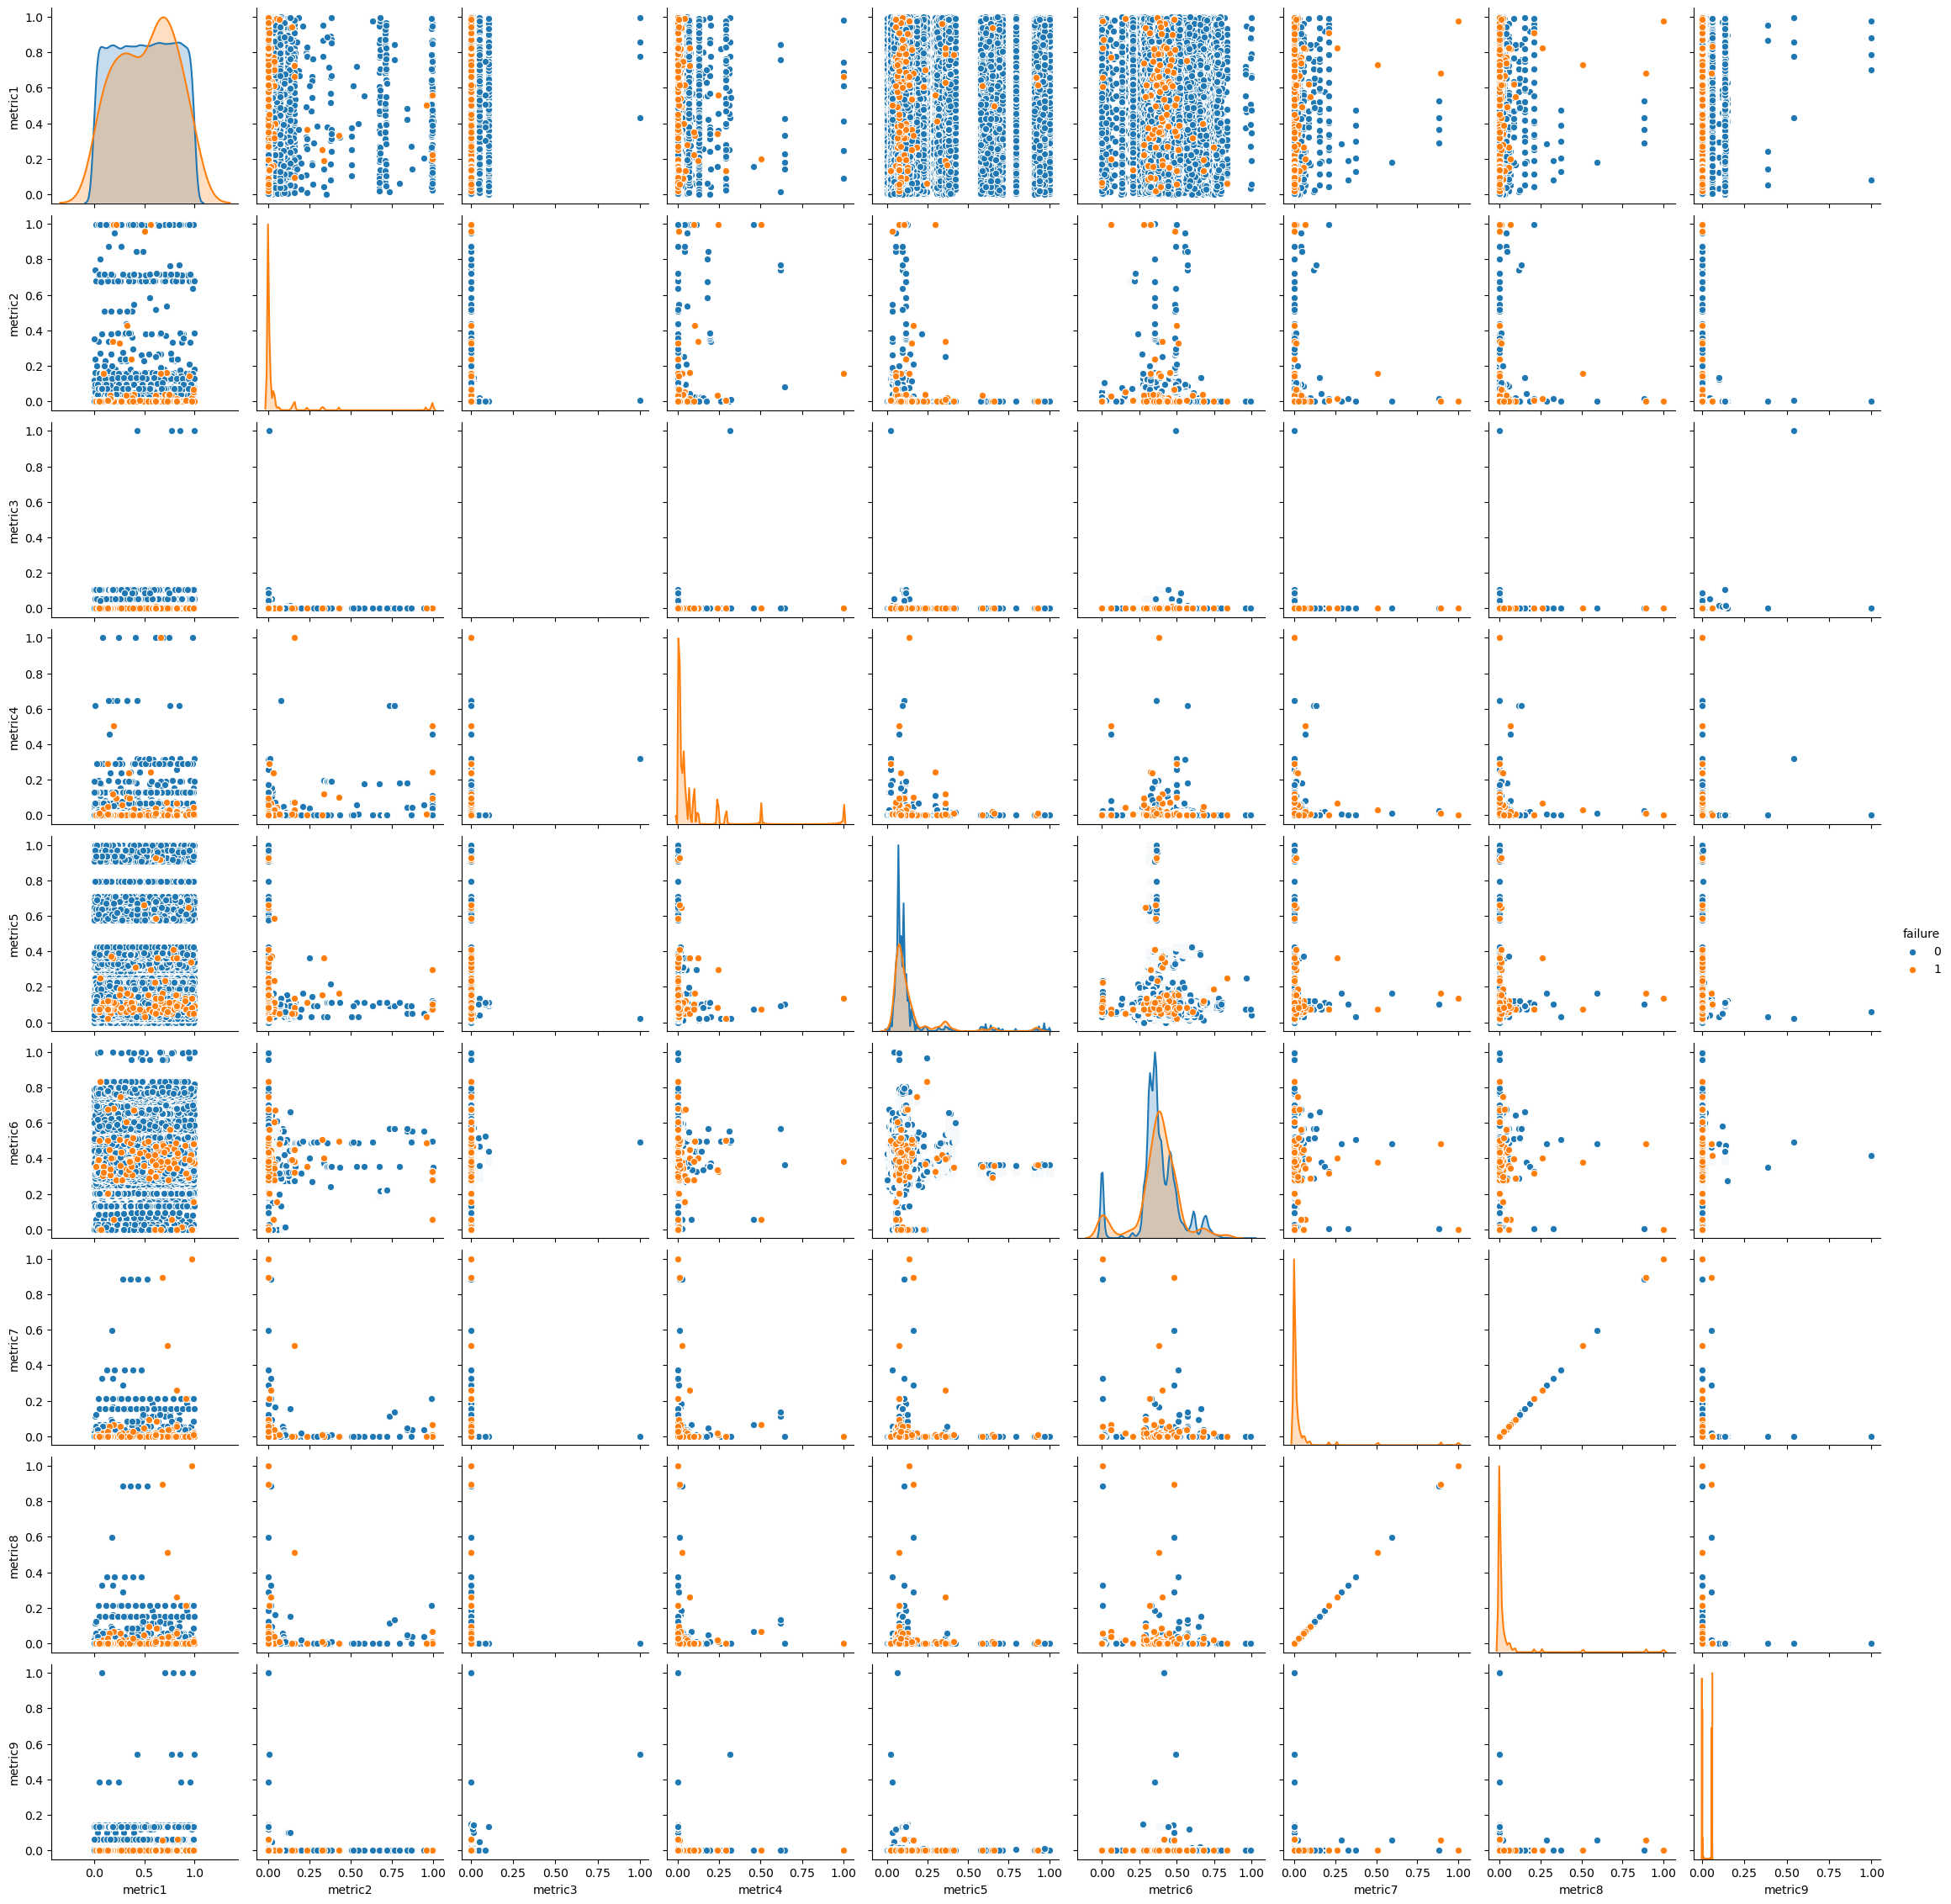

In [109]:
# Normalized and visulization
# Normalization metric1 ~ metric9

import warnings
warnings.filterwarnings('ignore')

columns_to_normalize = df[['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9']]
column_maxes = columns_to_normalize.max()
column_mins = columns_to_normalize.min()
normalized_df = (columns_to_normalize - column_mins) / (column_maxes - column_mins)
columns_data_ID = df[['device', 'failure', 'date_month', 'date_weekday']]
df_record = pd.concat([columns_data_ID, normalized_df], axis = 1)

sns.pairplot(df_record[['failure','metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9']], hue='failure', height=2.5)

In [22]:
# Data Explortary 
EDA = df[['device','failure','metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9']]

device_name = df_record["device"].unique()

to_plot = {}
for device in device_name:
    x = df_record[df_record["device"] == device][['device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9']]
    if (len(x) > 1) & (x['failure'].sum() > 0):
            to_plot[device] = x

In [23]:
to_plot.keys()

dict_keys(['S1F023H2', 'S1F03YZM', 'S1F09DZQ', 'S1F0CTDN', 'S1F0DSTY', 'S1F0F4EB', 'S1F0GG8X', 'S1F0GJW3', 'S1F0GKFX', 'S1F0GKL6', 'S1F0GPFZ', 'S1F0GSD9', 'S1F0GSHB', 'S1F0J5JH', 'S1F0JD7P', 'S1F0JGJV', 'S1F0L0DW', 'S1F0LCTV', 'S1F0LCVC', 'S1F0LD15', 'S1F0LD2C', 'S1F0P3G2', 'S1F0PJJW', 'S1F0QF3R', 'S1F0QY11', 'S1F0RR35', 'S1F0RRB1', 'S1F0RSZP', 'S1F0S2WJ', 'S1F0S4CA', 'S1F0S4EG', 'S1F0S4T6', 'S1F0S57T', 'S1F0S65X', 'S1F0T2LA', 'S1F0TQCV', 'S1F10E6M', 'S1F11MB0', 'S1F13589', 'S1F135TN', 'S1F136J0', 'S1F13H80', 'W1F03D4L', 'W1F03DP4', 'W1F08EDA', 'W1F0F6BN', 'W1F0FKWW', 'W1F0FW0S', 'W1F0GCAZ', 'W1F0KCP2', 'W1F0M35B', 'W1F0M4BZ', 'W1F0NZZZ', 'W1F0P114', 'W1F0PAXH', 'W1F0PNA5', 'W1F0Q8FH', 'W1F0SGHR', 'W1F0T034', 'W1F0T074', 'W1F0T0B1', 'W1F0TA59', 'W1F0VDH2', 'W1F0WBTM', 'W1F0X4FC', 'W1F0X5GW', 'W1F0Z1W9', 'W1F0Z3KR', 'W1F0Z4EA', 'W1F11ZG9', 'W1F1230J', 'W1F13SRV', 'W1F14XGD', 'W1F15S4D', 'W1F19BPT', 'W1F1BFP5', 'W1F1BS0H', 'W1F1BZTM', 'W1F1C9TE', 'W1F1C9WG', 'W1F1CB5E', 'W1F1CDDP', 'W1F1

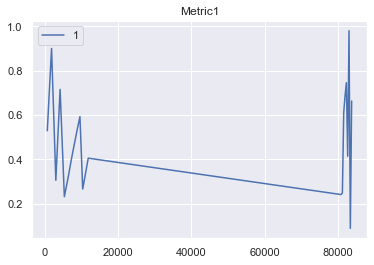

In [32]:
sns.set()
to_plot['W1F0X5GW']["metric1"].plot().set_title("Metric1")
plt.legend('1', ncol=2, loc='upper left')

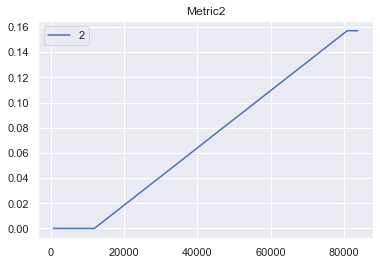

In [41]:
sns.set()
to_plot['W1F0X5GW']["metric2"].plot().set_title("Metric2")
plt.legend('2', ncol=2, loc='upper left')

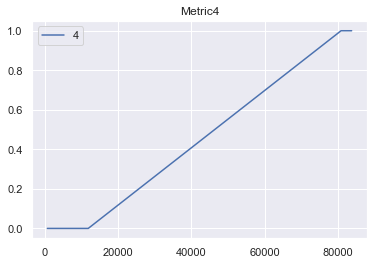

In [42]:
sns.set()
to_plot['W1F0X5GW']["metric4"].plot().set_title("Metric4")
plt.legend('4', ncol=2, loc='upper left')

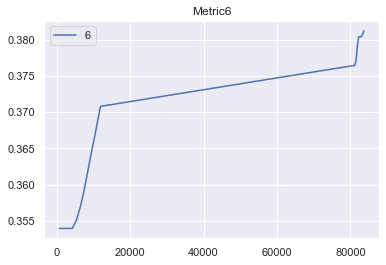

In [43]:
sns.set()
to_plot['W1F0X5GW']["metric6"].plot().set_title("Metric6")
plt.legend('6', ncol=2, loc='upper left')

In [110]:
# Create STD and PCT_Change columns for metric1, metric2, metric6

device_name = df_record["device"].unique()

def stdev(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]  
    variance = sum(deviations) / n
    std_dev = math.sqrt(variance)
    return std_dev

df_stack = pd.DataFrame(columns=['device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month', 'date_weekday', 
"metric1_std", "metric1_pct", "metric2_std", "metric2_pct","metric4_std", "metric4_pct", "metric6_std", "metric6_pct"])

for device in device_name:
    data = df_record[df_record["device"] == device]
    data["metric1_std"] = stdev(data["metric1"])
    data["metric1_pct"] = data["metric1"].pct_change()
    data["metric2_std"] = stdev(data["metric2"])
    data["metric2_pct"] = data["metric2"].pct_change()
    data["metric4_std"] = stdev(data["metric4"])
    data["metric4_pct"] = data["metric4"].pct_change()
    data["metric6_std"] = stdev(data["metric6"])
    data["metric6_pct"] = data["metric6"].pct_change()
    df_stack = pd.concat([df_stack, data])

df_record = df_record.join(df_stack[["metric1_std", "metric1_pct", "metric2_std", "metric2_pct","metric4_std", "metric4_pct", "metric6_std", "metric6_pct"]], how='left')

impact_columns = ['metric1_pct','metric2_pct','metric4_pct','metric6_pct']
[df_record[col].replace(np.inf, 1, inplace=True) for col in impact_columns]
[df_record[col].replace(np.nan, 0, inplace=True) for col in impact_columns]


[None, None, None, None]

In [108]:
df_record.head()

device  failure  date_month  date_weekday   metric1   metric2  metric3  \
0  S1F01085        0           1             3  0.883224  0.000862  0.00000   
1  S1F0166B        0           1             3  0.251374  0.000000  0.00012   
2  S1F01E6Y        0           1             3  0.709821  0.000000  0.00000   
3  S1F01JE0        0           1             3  0.326427  0.000000  0.00000   
4  S1F01R2B        0           1             3  0.556935  0.000000  0.00000   

    metric4   metric5   metric6  ...  metric8   metric9  metric1_std  \
0  0.031212  0.051546  0.591204  ...      0.0  0.000374     0.257554   
1  0.000000  0.051546  0.585017  ...      0.0  0.000000     0.310377   
2  0.000000  0.113402  0.344461  ...      0.0  0.000000     0.276362   
3  0.000000  0.051546  0.595191  ...      0.0  0.000000     0.240849   
4  0.000000  0.144330  0.454420  ...      0.0  0.000160     0.277976   

   metric1_pct   metric2_std  metric2_pct   metric4_std  metric4_pct  \
0          0.0  1.084202e-19          0.0  3.469447e-18          0.0   
1          0.0  0.000000e+00          0.0  0.000000e+00          0.0   
2          0.0  0.000000e+00          0.0  0.000000e+00          0.0   
3          0.0  0.000000e+00          0.0  0.000000e+00          0.0   
4          0.0  0.000000e+00          0.0  0.000000e+00          0.0   

   metric6_std  metric6_pct  
0     0.001053          0.0  
1     0.000871          0.0  
2     0.009542          0.0  
3     0.001054          0.0  
4     0.006854          0.0  

[5 rows x 21 columns]

### 2.3 Train/test split

Class 0: 124388
Class 1: 106
Proportion: 1173.47 : 1


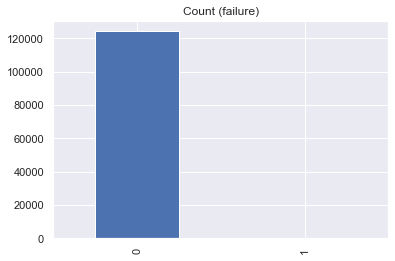

In [47]:
# Investigation
target_count = df_record.failure.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (failure)');

Class 0: 99219
Class 1: 88
Proportion: 1127.49 : 1


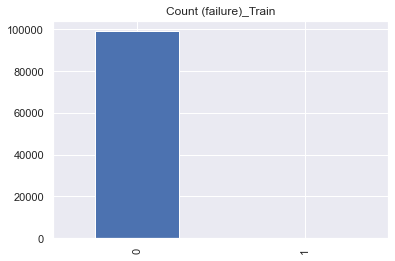

In [48]:
# GroupShuffleSplit
from sklearn.model_selection import GroupShuffleSplit

train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(df_record[['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std', 'metric2_pct',
       'metric4_std', 'metric4_pct','metric6_std', 'metric6_pct']], groups=df_record['device']))

train_X = df_record.iloc[train_inds][['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std', 'metric2_pct',
       'metric4_std', 'metric4_pct','metric6_std', 'metric6_pct']]
                                      
train_y = df_record.iloc[train_inds]['failure']

test_X = df_record.iloc[test_inds][['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std', 'metric2_pct',
       'metric4_std', 'metric4_pct', 'metric6_std', 'metric6_pct']]
                                    
test_y = df_record.iloc[test_inds]['failure']
train_y = train_y.astype('int')
test_y = test_y.astype('int')

# Investigation
target_count = train_y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (failure)_Train');

Class 0: 105732
Class 1: 87
Proportion: 1215.31 : 1


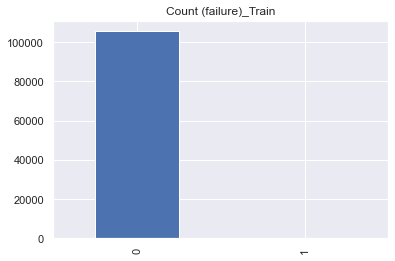

In [49]:
# Random Train_Test_Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_record[['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std',
       'metric2_pct', 'metric4_std', 'metric4_pct', 'metric6_std', 'metric6_pct']].values, df_record.failure.values, test_size=0.15, random_state = 7)

X_train = pd.DataFrame(X_train, columns = ['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std',
       'metric2_pct', 'metric4_std', 'metric4_pct', 'metric6_std', 'metric6_pct'])

X_test = pd.DataFrame(X_test, columns = ['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std',
       'metric2_pct', 'metric4_std', 'metric4_pct', 'metric6_std', 'metric6_pct'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

y_train = pd.Series(y_train) 
y_test = pd.Series(y_test)

y_train.name = "failure"
y_test.name = "failure"

# Investigation
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (failure)_Train');

### 2.4 Imbalanced process - upsampling

In [50]:
import imblearn 
from collections import Counter

X = train_X
y = train_y
counter = Counter(y)
print(counter)

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Counter({0: 99219, 1: 88})


In [ ]:
# Method 1 - Upsampling all - Random
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
train_resample= X_ros.join(y_ros, how='left')

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

# plot_2d_space(X_ros, y_ros, 'Random over-sampling')

train_resample_X = X_ros
train_resample_y = y_ros

In [ ]:
# Method 2 - Upsampling all - SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=7)
X_sm, y_sm = smote.fit_resample(X, y)
train_resample= X_sm.join(y_sm, how='left')

counter = Counter(y_sm)
print(counter)
# plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

train_resample_X = X_sm
train_resample_y = y_sm

In [107]:
# Method 3 - Upsampling on device basis
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

device_name = df_record["device"].unique()

df_over_sampling_X = pd.DataFrame(columns=['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std',
       'metric2_pct', 'metric4_std', 'metric4_pct', 'metric6_std', 'metric6_pct'])
df_over_sampling_y = pd.DataFrame(columns=['failure'])
n_new_rows = 0

for device in device_name:
    data = df_record[df_record["device"] == device]
    X_single = data[['device','metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std', 'metric2_pct','metric4_std', 'metric4_pct', 'metric6_std', 'metric6_pct']]
    y_single = pd.DataFrame(data['failure'], columns = ['failure'])
    if len(data['failure'].unique()) == 2:   
        ros = RandomOverSampler()
        X_ros, y_ros = ros.fit_resample(X_single, y_single)
        n_new_rows += X_ros.shape[0] - X_single.shape[0]

        df_over_sampling_X = pd.concat([df_over_sampling_X, X_ros])
        df_over_sampling_y = pd.concat([df_over_sampling_y, y_ros])
    else:
        df_over_sampling_X = pd.concat([df_over_sampling_X, X_single])
        df_over_sampling_y = pd.concat([df_over_sampling_y, y_single])

print("n_new_rows", n_new_rows)
train_resample= pd.concat([df_over_sampling_X,df_over_sampling_y], axis = 1)

train_resample_X = df_over_sampling_X[['metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_month',
       'date_weekday', 'metric1_std', 'metric1_pct', 'metric2_std',
       'metric2_pct', 'metric4_std', 'metric4_pct', 'metric6_std', 'metric6_pct']]
train_resample_y = df_over_sampling_y.astype('int')


n_new_rows 10501


# 3. Modelling

## 3.1. Logistic Regression

In [83]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (2, 2)
plt.style.use('default')

Accuracy:  0.8062095525469488
Precision:  0.0024554941682013503
Recall:  0.6666666666666666
F1 score:  0.004892966360856269
MCC score:  0.03196238384478931
                 precision    recall  f1-score   support

Class 0 Sucess:       1.00      0.81      0.89     25169
  Class 1 Fail:       0.00      0.67      0.00        18

       accuracy                           0.81     25187
      macro avg       0.50      0.74      0.45     25187
   weighted avg       1.00      0.81      0.89     25187

Confusion matrix:  [[20294  4875]
 [    6    12]]


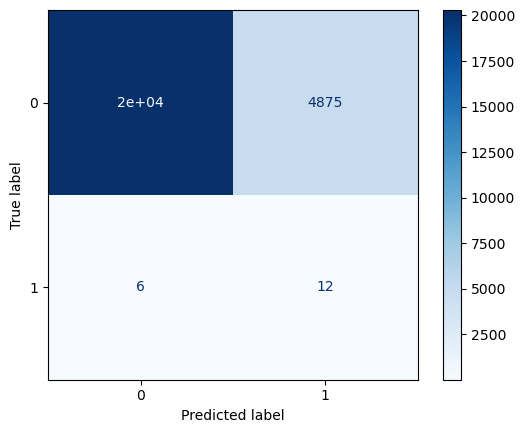

In [84]:
# Logistic Regression Model - Shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

LR = LogisticRegression(max_iter=1000, class_weight='balanced')
# Fit the model on the trainng data.
LR.fit(train_resample_X, train_resample_y.values.ravel())

# Print the accuracy, precision, recall from the testing data.
print("Accuracy: ", accuracy_score(test_y, LR.predict(test_X)))
print("Precision: ", precision_score(test_y, LR.predict(test_X)))
print("Recall: ", recall_score(test_y, LR.predict(test_X)))
print("F1 score: ", f1_score(test_y, LR.predict(test_X)))
print("MCC score: ", matthews_corrcoef(test_y, LR.predict(test_X)))
print(classification_report(test_y, LR.predict(test_X), target_names=['Class 0 Sucess:', 'Class 1 Fail:']))

# Plot Confusion Matrix
print("Confusion matrix: ", confusion_matrix(test_y, LR.predict(test_X)))
cm=confusion_matrix(test_y, LR.predict(test_X))
plot_confusion_matrix(LR, test_X, test_y, cmap=plt.cm.Blues)  
plt.show() 

AUC_ROC: 0.841
AUC_PR: 0.074


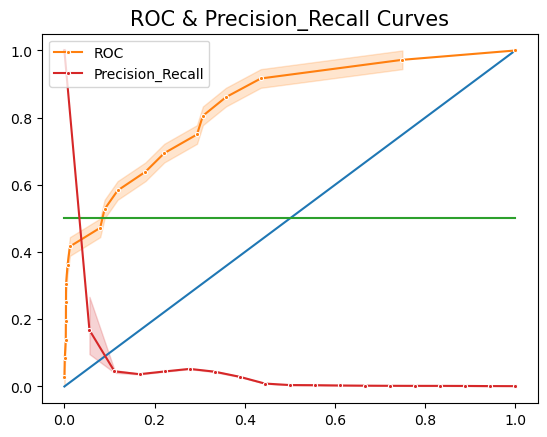

In [85]:
# Plot ROC Curve - Shuffle
probs = LR.predict_proba(test_X)
probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(test_y, probs)
sns.lineplot([0,1], [0, 1], linestyle="--")
plt = sns.lineplot(fpr, tpr, marker = ".", legend='full', label=str("ROC"))
plt.set_title("ROC & Precision_Recall Curves", fontsize=15)
auc_score = roc_auc_score(test_y, probs)
print("AUC_ROC: %.3f" % auc_score)

# Plot Precision/Recall Curve
probs = LR.predict_proba(test_X)
probs = probs[:,1]
precision, recall, thresholds = precision_recall_curve(test_y, probs)
sns.lineplot([0,1], [0.5, 0.5], linestyle="--")
plt = sns.lineplot(recall, precision, marker = ".", legend='full', label=str("Precision_Recall"))
pr_auc_score = auc(recall, precision)
print("AUC_PR: %.3f" % pr_auc_score)

## 3.2. SVM Model

Accuracy:  0.7987453845237622
Precision:  0.0025605672641323615
Recall:  0.7222222222222222
F1 score:  0.005103042198233562
MCC score:  0.03470691047367835
                 precision    recall  f1-score   support

Class 0 Sucess:       1.00      0.80      0.89     25169
  Class 1 Fail:       0.00      0.72      0.01        18

       accuracy                           0.80     25187
      macro avg       0.50      0.76      0.45     25187
   weighted avg       1.00      0.80      0.89     25187

Confusion matrix:  [[20105  5064]
 [    5    13]]


<Figure size 640x480 with 0 Axes>

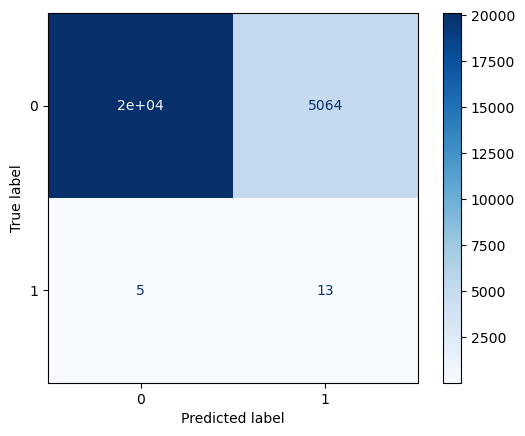

In [97]:
# SVM Model - Shuffle
from sklearn.svm import SVC
from sklearn import preprocessing

SVC = SVC(kernel='linear', class_weight='balanced', probability=True)

# Fit the model on the trainng data.
SVC.fit(train_resample_X, train_resample_y.values.ravel())

pred_y = SVC.predict(test_X)
# Print the accuracy, precision, recall from the testing data.
print("Accuracy: ", accuracy_score(test_y, pred_y))
print("Precision: ", precision_score(test_y, pred_y))
print("Recall: ", recall_score(test_y, pred_y))
print("F1 score: ", f1_score(test_y, pred_y))
print("MCC score: ", matthews_corrcoef(test_y, pred_y))
print(classification_report(test_y, pred_y, target_names=['Class 0 Sucess:', 'Class 1 Fail:']))

# Plot Confusion Matrix
import matplotlib.pyplot as plt
print("Confusion matrix: ", confusion_matrix(test_y, pred_y))
cm=confusion_matrix(test_y, pred_y)
plt.clf()
plot_confusion_matrix(SVC, test_X, test_y, cmap=plt.cm.Blues)  
plt.show()

## 3.3. Random Forest Model

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
MCC score:  1.0
                 precision    recall  f1-score   support

Class 0 Sucess:       1.00      1.00      1.00     25169
  Class 1 Fail:       1.00      1.00      1.00        18

       accuracy                           1.00     25187
      macro avg       1.00      1.00      1.00     25187
   weighted avg       1.00      1.00      1.00     25187

Confusion matrix:  [[25169     0]
 [    0    18]]


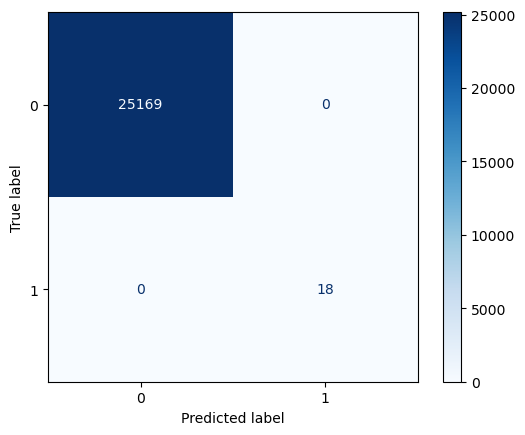

In [86]:
# Random Forest Model - Ruffle

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=10)

# Train
RF.fit(train_resample_X, train_resample_y.values.ravel())
# Extract single tree
estimator = RF.estimators_[5]

# Print the accuracy, precision, recall from the testing data.
print("Accuracy: ", accuracy_score(test_y, RF.predict(test_X)))
print("Precision: ", precision_score(test_y, RF.predict(test_X)))
print("Recall: ", recall_score(test_y, RF.predict(test_X)))
print("F1 score: ", f1_score(test_y, RF.predict(test_X)))
print("MCC score: ", matthews_corrcoef(test_y, RF.predict(test_X)))
print(classification_report(test_y, RF.predict(test_X), target_names=['Class 0 Sucess:', 'Class 1 Fail:']))

# Plot Confusion Matrix
print("Confusion matrix: ", confusion_matrix(test_y, RF.predict(test_X)))
cm=confusion_matrix(test_y, RF.predict(test_X))
plot_confusion_matrix(RF, test_X, test_y, cmap=plt.cm.Blues)  
plt.show() 

AUC: 1.000
AUC: 1.000


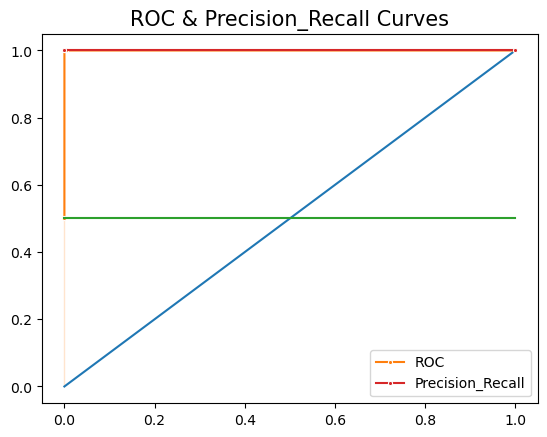

In [87]:
# Plot ROC Curve - Ruffle
probs = RF.predict_proba(test_X)
probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(test_y, probs)
sns.lineplot([0,1], [0, 1], linestyle="--")
plt = sns.lineplot(fpr, tpr, marker = ".", legend='full', label=str("ROC"))
plt.set_title("ROC & Precision_Recall Curves", fontsize=15)
auc_score = roc_auc_score(test_y, probs)
print("AUC: %.3f" % auc_score)

# Plot Precision/Recall Curve
probs = RF.predict_proba(test_X)
probs = probs[:,1]
precision, recall, thresholds = precision_recall_curve(test_y, probs)
sns.lineplot([0,1], [0.5, 0.5], linestyle="--")
plt = sns.lineplot(recall, precision, marker = ".", legend='full', label=str("Precision_Recall"))
pr_auc_score = auc(recall, precision)
print("AUC: %.3f" % pr_auc_score)

19


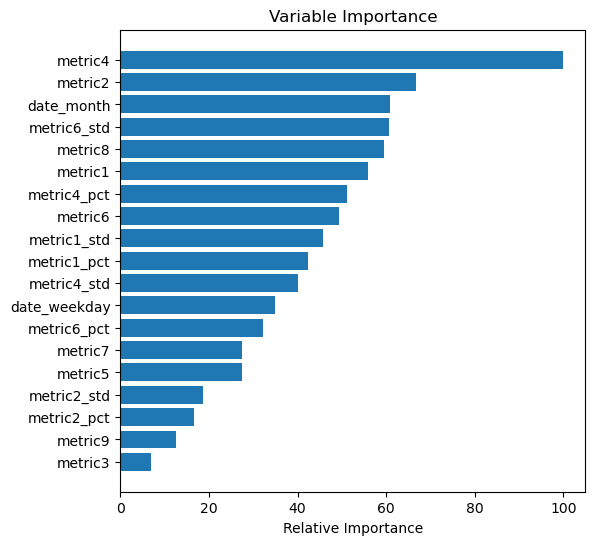

In [90]:
import matplotlib.pyplot as plt

feature_importance = RF.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(6,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## 3.4. Decision Tree Model

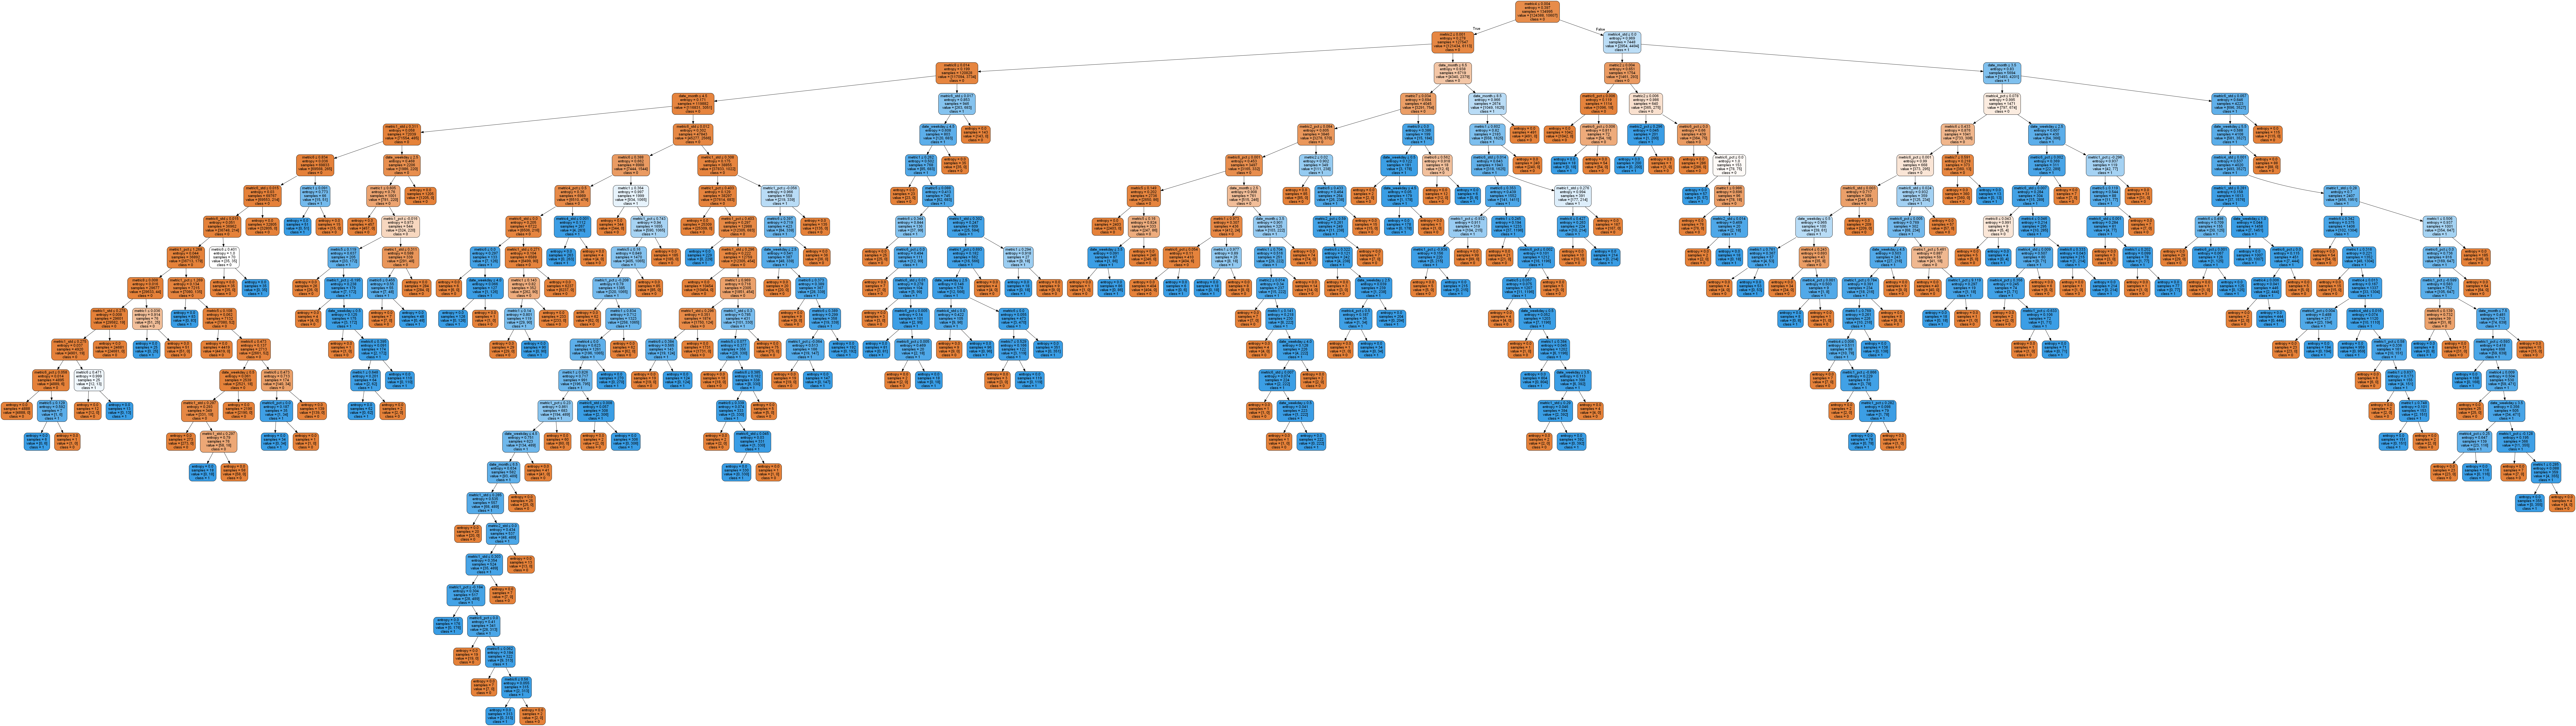

In [94]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'
import graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=train_X.columns,class_names = ["0", "1"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Model Entropy - no max depth
Accuracy:  1.0
Balanced accuracy: 1.0
Precision for Normal:  1.0
Precision for Failure:  1.0
Recall for Normal:  1.0
Recall for Failure:  1.0
F1 score:  1.0
MCC score:  1.0
                 precision    recall  f1-score   support

Class 0 Sucess:       1.00      1.00      1.00     25169
  Class 1 Fail:       1.00      1.00      1.00        18

       accuracy                           1.00     25187
      macro avg       1.00      1.00      1.00     25187
   weighted avg       1.00      1.00      1.00     25187

Confusion matrix:  [[25169     0]
 [    0    18]]


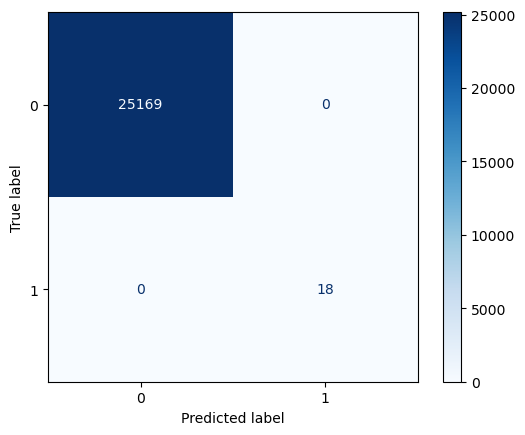

In [93]:
# Decision Tree Model - Ruffle

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

DT = tree.DecisionTreeClassifier(criterion="entropy", random_state = 7)

# Train
DT.fit(train_resample_X, train_resample_y.values.ravel())

# Print the accuracy, precision, recall from the testing data.
print("Model Entropy - no max depth")
print("Accuracy: ", accuracy_score(test_y, DT.predict(test_X)))
print("Balanced accuracy:", balanced_accuracy_score(test_y, DT.predict(test_X)))
print("Precision for Normal: ", precision_score(test_y, DT.predict(test_X), pos_label = 0))
print("Precision for Failure: ", precision_score(test_y, DT.predict(test_X), pos_label = 1))
print("Recall for Normal: ", recall_score(test_y, DT.predict(test_X), pos_label = 0))
print("Recall for Failure: ", recall_score(test_y, DT.predict(test_X), pos_label = 1))
print("F1 score: ", f1_score(test_y, DT.predict(test_X)))
print("MCC score: ", matthews_corrcoef(test_y, DT.predict(test_X)))
print(classification_report(test_y, DT.predict(test_X), target_names=['Class 0 Sucess:', 'Class 1 Fail:']))

# Plot Confusion Matrix
print("Confusion matrix: ", confusion_matrix(test_y, DT.predict(test_X)))
cm=confusion_matrix(test_y, DT.predict(test_X))
plot_confusion_matrix(DT, test_X, test_y, cmap=plt.cm.Blues)  
plt.show() 

## 3.5. Deep Learning Model - Neural Network

0.9906300869496169
Accuracy:  0.9906300869496169
Balanced accuracy: 0.9675537808856574
Precision for Normal:  0.9999598957288951
Precision for Failure:  0.06746031746031746
Recall for Normal:  0.9906631173268704
Recall for Failure:  0.9444444444444444
F1 score:  0.1259259259259259
MCC score:  0.2510879351332254
                 precision    recall  f1-score   support

Class 0 Sucess:       1.00      0.99      1.00     25169
  Class 1 Fail:       0.07      0.94      0.13        18

       accuracy                           0.99     25187
      macro avg       0.53      0.97      0.56     25187
   weighted avg       1.00      0.99      0.99     25187

Confusion matrix:  [[24934   235]
 [    1    17]]


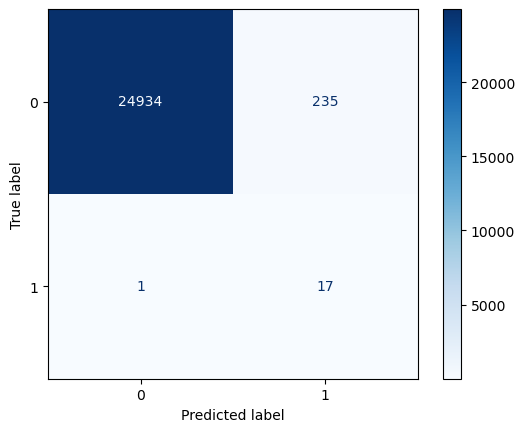

In [95]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(max_iter=1000, hidden_layer_sizes=(12,6),activation="logistic",random_state = 7)
MLP.fit(train_resample_X, train_resample_y.values.ravel())
y_pred=MLP.predict(test_X)
print(MLP.score(test_X, test_y))

print("Accuracy: ", accuracy_score(test_y, MLP.predict(test_X)))
print("Balanced accuracy:", balanced_accuracy_score(test_y, MLP.predict(test_X)))
print("Precision for Normal: ", precision_score(test_y, MLP.predict(test_X), pos_label = 0))
print("Precision for Failure: ", precision_score(test_y, MLP.predict(test_X), pos_label = 1))
print("Recall for Normal: ", recall_score(test_y, MLP.predict(test_X), pos_label = 0))
print("Recall for Failure: ", recall_score(test_y, MLP.predict(test_X), pos_label = 1))
print("F1 score: ", f1_score(test_y, MLP.predict(test_X)))
print("MCC score: ", matthews_corrcoef(test_y, MLP.predict(test_X)))
print(classification_report(test_y, MLP.predict(test_X), target_names=['Class 0 Sucess:', 'Class 1 Fail:']))

# Plot Confusion Matrix
print("Confusion matrix: ", confusion_matrix(test_y, MLP.predict(test_X)))
cm=confusion_matrix(test_y, MLP.predict(test_X))
plot_confusion_matrix(MLP, test_X, test_y, cmap=plt.cm.Blues)  
plt.show() 


## 3.6. Voting Classifier

Hard Voting Score  0
Soft Voting Score  0
Confusion matrix:  [[25169     0]
 [    1    17]]


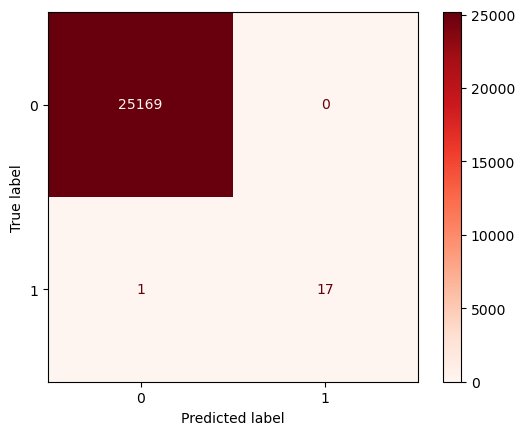

Confusion matrix:  [[25164     5]
 [    0    18]]


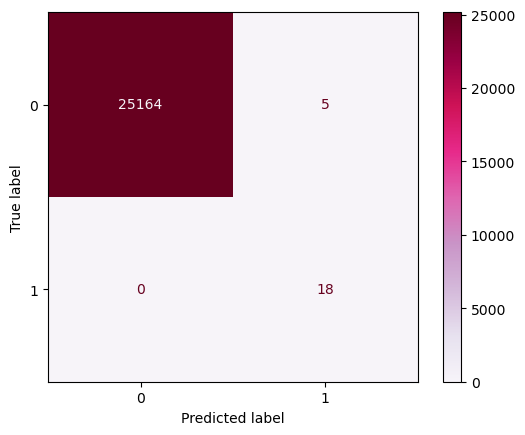

In [96]:
# Voting Hard Model

from sklearn.ensemble import VotingClassifier


# group / ensemble of models
estimator = []
estimator.append(('LR', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=7)))
# estimator.append(('SVC', SVC(kernel='linear', class_weight='balanced', probability=True, random_state=7)))
estimator.append(('RF', RandomForestClassifier(n_estimators=10, random_state=7)))
estimator.append(('DT', DecisionTreeClassifier(criterion="entropy", random_state=7)))
estimator.append(('MLP', MLPClassifier(max_iter=1000, hidden_layer_sizes=(12,6),activation="logistic",random_state = 7)))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(train_resample_X, train_resample_y.values.ravel())
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(test_y, vot_hard.predict(test_X))
print("Hard Voting Score % d" % score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(train_resample_X, train_resample_y.values.ravel())
  
# using accuracy_score
score = accuracy_score(test_y, vot_soft.predict(test_X))
print("Soft Voting Score % d" % score)

# Plot Confusion Matrix - hard
print("Confusion matrix: ", confusion_matrix(test_y, vot_hard.predict(test_X)))
cm=confusion_matrix(test_y, vot_hard.predict(test_X))
plot_confusion_matrix(vot_hard, test_X, test_y, cmap=plt.cm.Reds)  
plt.show() 

# Plot Confusion Matrix - soft
print("Confusion matrix: ", confusion_matrix(test_y, vot_soft.predict(test_X)))
cm=confusion_matrix(test_y, vot_soft.predict(test_X))
plot_confusion_matrix(vot_soft, test_X, test_y, cmap=plt.cm.PuRd)  
plt.show() 

# 4. Evaluating and Concluding
## 4.1 Precision and Recall Comparison

In [100]:
# Overall Comparison 

models = [{'name': 'LR','label': 'Model 1: Logistic Regression',
           'classifier': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=7)},
          
          {'name': 'SVC', 'label': 'Model 2: Support Vector Machine',
           'classifier': SVC(kernel='linear', class_weight='balanced', probability=True, random_state=7)},
          
          {'name': 'RF', 'label': 'Model 3: Random Forest',
           'classifier': RandomForestClassifier(n_estimators=10, random_state=7)},
          
          {'name': 'DT','label': 'Model 4: Descision Tree', 
           'classifier': DecisionTreeClassifier(criterion="entropy", random_state=7)},
          
          {'name': 'MLP','label': 'Model 5: Neural Network',
           'classifier': MLPClassifier(max_iter=1000, hidden_layer_sizes=(12,6),activation="logistic",random_state = 7)},
          
          {'name': 'VCH','label': 'Model 6: Voting Classifier - Hard',
           'classifier': VotingClassifier(estimators = estimator, voting ='hard')},
         
          {'name': 'VCS','label': 'Model 7: Voting Classifier - Soft',
           'classifier': VotingClassifier(estimators = estimator, voting ='soft')}]

models_AUC = [{'name': 'LR','label': 'Model 1: Logistic Regression',
           'classifier': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=7)},
                   
          {'name': 'RF', 'label': 'Model 3: Random Forest',
           'classifier': RandomForestClassifier(n_estimators=10, random_state=7)},
          
          {'name': 'DT','label': 'Model 4: Descision Tree', 
           'classifier': DecisionTreeClassifier(criterion="entropy", random_state=7)},
          
          {'name': 'MLP','label': 'Model 5: Neural Network',
           'classifier': MLPClassifier(max_iter=1000, hidden_layer_sizes=(12,6),activation="logistic",random_state = 7)},
         
          {'name': 'VCS','label': 'Model 7: Voting Classifier - Soft',
           'classifier': VotingClassifier(estimators = estimator, voting ='soft')}]


In [101]:
# Ruffle

from tqdm import tqdm
import time

for i in tqdm(range(10800)):
    time.sleep(0.1)

test_ori_X = test_X
test_ori_y = test_y

results = pd.DataFrame()
precision_result = []
recall_result = []
for m in models:
    m['classifier'].fit(train_resample_X, train_resample_y.values.ravel())
    pred_ori_y = m['classifier'].predict(test_ori_X)
    results.loc[m['label'], 'Accuracy'] = accuracy_score(test_ori_y, pred_ori_y)    
    results.loc[m['label'], 'Precision_0'] = precision_score(test_ori_y, pred_ori_y, pos_label = 0)
    results.loc[m['label'], 'Precision_1'] = precision_score(test_ori_y, pred_ori_y, pos_label = 1)
    results.loc[m['label'], 'Recall_0'] = recall_score(test_ori_y, pred_ori_y, pos_label = 0)
    results.loc[m['label'], 'Recall_1'] = recall_score(test_ori_y, pred_ori_y, pos_label = 1)   

100%|██████████| 10800/10800 [18:21<00:00,  9.80it/s]


In [102]:
# Ruffle - AUC_pr score

from tqdm import tqdm
import time

for i in tqdm(range(10800)):
    time.sleep(0.1)
    
test_ori_X = test_X
test_ori_y = test_y

results_AUC = pd.DataFrame()
for m in models_AUC:
    m['classifier'].fit(train_resample_X, train_resample_y.values.ravel())
    probs = m['classifier'].predict_proba(test_ori_X)
    probs = probs[:,1]
    precision, recall, thresholds = precision_recall_curve(test_ori_y, probs)
    results_AUC.loc[m['label'], 'AUC_pr'] = auc(recall, precision)

100%|██████████| 10800/10800 [18:18<00:00,  9.83it/s]


In [141]:
print(results_AUC)

                                     AUC_pr
Model 1: Logistic Regression       0.052511
Model 3: Random Forest             1.000000
Model 4: Descision Tree            1.000000
Model 5: Neural Network            0.161586
Model 7: Voting Classifier - Soft  0.996995


In [106]:
# Ranking Based on Criteria AUC_pr > Recall_1 > Precision_1 > Accuracy 
results.loc['Model 1: Logistic Regression','Ranking'] = 7
results.loc['Model 2: Support Vector Machine','Ranking'] = 6
results.loc['Model 3: Random Forest','Ranking'] = 2
results.loc['Model 4: Descision Tree','Ranking'] = 1
results.loc['Model 5: Neural Network','Ranking'] = 5
results.loc['Model 6: Voting Classifier - Hard','Ranking'] = 4
results.loc['Model 7: Voting Classifier - Soft','Ranking'] = 3
results['Ranking'] = results['Ranking'].astype(int)

print(results)

                                   Accuracy  Precision_0  Precision_1  \
Model 1: Logistic Regression       0.806210     0.999704     0.002455   
Model 2: Support Vector Machine    0.798745     0.999751     0.002561   
Model 3: Random Forest             1.000000     1.000000     1.000000   
Model 4: Descision Tree            1.000000     1.000000     1.000000   
Model 5: Neural Network            0.990630     0.999960     0.067460   
Model 6: Voting Classifier - Hard  0.999960     0.999960     1.000000   
Model 7: Voting Classifier - Soft  0.999801     1.000000     0.782609   

                                   Recall_0  Recall_1  Ranking  
Model 1: Logistic Regression       0.806309  0.666667        7  
Model 2: Support Vector Machine    0.798800  0.722222        6  
Model 3: Random Forest             1.000000  1.000000        2  
Model 4: Descision Tree            1.000000  1.000000        1  
Model 5: Neural Network            0.990663  0.944444        5  
Model 6: Voting Classifie

## 4.2 Conclusion and Recommendation

SMOTE upsampling based on each device with failure history is an effective way to improve the performance of all the machine learning models as well as GroupShuffleSplit method. 

Learning from the history data of each device, the standard deviaion and 
percentage change are good indicators to represent the abnormal performance 
before each failure. Before failure, there is always unusual reading from some 
metrics. Having new features created as these indicators improves the performance of 
models significantly.

Based on the importance/criteria of this project to minimize false
positives and false negatives, the recommended models are determined
based on the ranking column as above. It shows the Decision Tree is best
model with both Precision\_1/Recall\_1 with the highest scores as well as
AUC\_pr score. The 2nd and 3rd best models are the Random Forest and the Voting
Classifier(Soft). I would recommend to use the Decision Tree as the final
model with the best prediction performance designed for this project.

